In [22]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [106]:
font = {'family' : 'monospace',
        'size'   : 18}

matplotlib.rc('font', **font)

In [107]:
def parse_log(filename, tau):
    LR_values = [[] for i in xrange(50)]
    L_values = [[] for i in xrange(50)]
    R_values = [[] for i in xrange(50)]
    minPhi_values = [[] for i in xrange(50)]
    minTheta_values = [[] for i in xrange(50)]
    RMstepDiff = [[] for i in xrange(50)]
    LogRMstepDiffPerL2 = [[] for i in xrange(50)]
    RMstepDiffPerL2 = [[] for i in xrange(50)]
    RMstepDiffPerL1 = [[] for i in xrange(50)]
    MinTopicSize = [[] for i in xrange(50)]
    NonzeroTopics = [[] for i in xrange(50)]
    
    
    with open(filename, 'r') as fi:
        for line in fi.xreadlines():
            tokens = line.strip().split(' ')
            if tokens[0] == 'launch':
                curr_launch = int(tokens[1])
            if tokens[0] == 'iteration':
                curr_iter = int(tokens[1])
            if tokens[0] == 'Lvalue':
                L_values[curr_iter].append(float(tokens[1]))
            if tokens[0] == 'LRvalue':
                LR_values[curr_iter].append(float(tokens[1]))
            if tokens[0] == 'Rvalue':
                R_values[curr_iter].append(- tau * float(tokens[1]))
            if tokens[0] == 'MinPhiValue':
                minPhi_values[curr_iter].append(np.log(float(tokens[1])) / np.log(10.))
            if tokens[0] == 'MinThetaValue':
                minTheta_values[curr_iter].append(np.log(float(tokens[1])) / np.log(10.))
            if tokens[0] == 'RMstepDiff':
                RMstepDiff[curr_iter].append(- tau * float(tokens[1]))
            if tokens[0] == 'RMstepDiffPerL1':
                RMstepDiffPerL1[curr_iter].append(- tau * float(tokens[1]))
            if tokens[0] == 'RMstepDiffPerL2':
                RMstepDiffPerL2[curr_iter].append(- tau * float(tokens[1]))
                LogRMstepDiffPerL2[curr_iter].append(np.log(abs(float(tokens[1]))))
            if tokens[0] == 'TopicSizes':
                topics = map(float, tokens[1:])
                MinTopicSize[curr_iter].append(min(topics))
                NonzeroTopics[curr_iter].append(len([x for x in topics if x > 1000]))
                
    return {
        'LR_values': LR_values,
        'L_values': L_values,
        'R_values': R_values,
        'minPhi_values': minPhi_values,
        'minTheta_values': minTheta_values,
        'RMstepDiff': RMstepDiff,
        'RMstepDiffPerL1': RMstepDiffPerL1,
        'RMstepDiffPerL2': RMstepDiffPerL2,
        'MinTopicSize': MinTopicSize,
        'NonzeroTopics': NonzeroTopics,
        'LogRMstepDiffPerL2': LogRMstepDiffPerL2
    }


In [108]:
import numpy as np

In [109]:
TEMPLATE = 'E:/diploma_logs/topics_{topics}/{ttype}_topics_{topics}_reg_tau_{tau}.000000.log'
TYPES = ['original', 'unbiased', 'gradient_x1', 'gradient_x50']
TAUS = [100000, 1000000, 10000000, 100000000]

In [110]:
def plot(topics, name, legeng_loc, x_axis, y_axis, start_pos=1):
    plt.figure(figsize=(18, 10))
    for i, tau in enumerate(TAUS):
        plt.subplot(2, 2, i + 1)
        plt.title('tau = ' + str(tau))
        for ttype in TYPES:
            values = [np.mean(x) for x in parse_log(TEMPLATE.format(topics=topics, tau=tau, ttype=ttype), tau)[name]]
            plt.plot(range(start_pos, 50), values[start_pos:])
            plt.legend(TYPES, loc=legeng_loc)
            plt.xlabel(x_axis)
            plt.ylabel(y_axis)
    plt.tight_layout()
    plt.savefig('E:/topics_' + str(topics) + '_' + str(name) + '.eps', format='eps')
    plt.show()

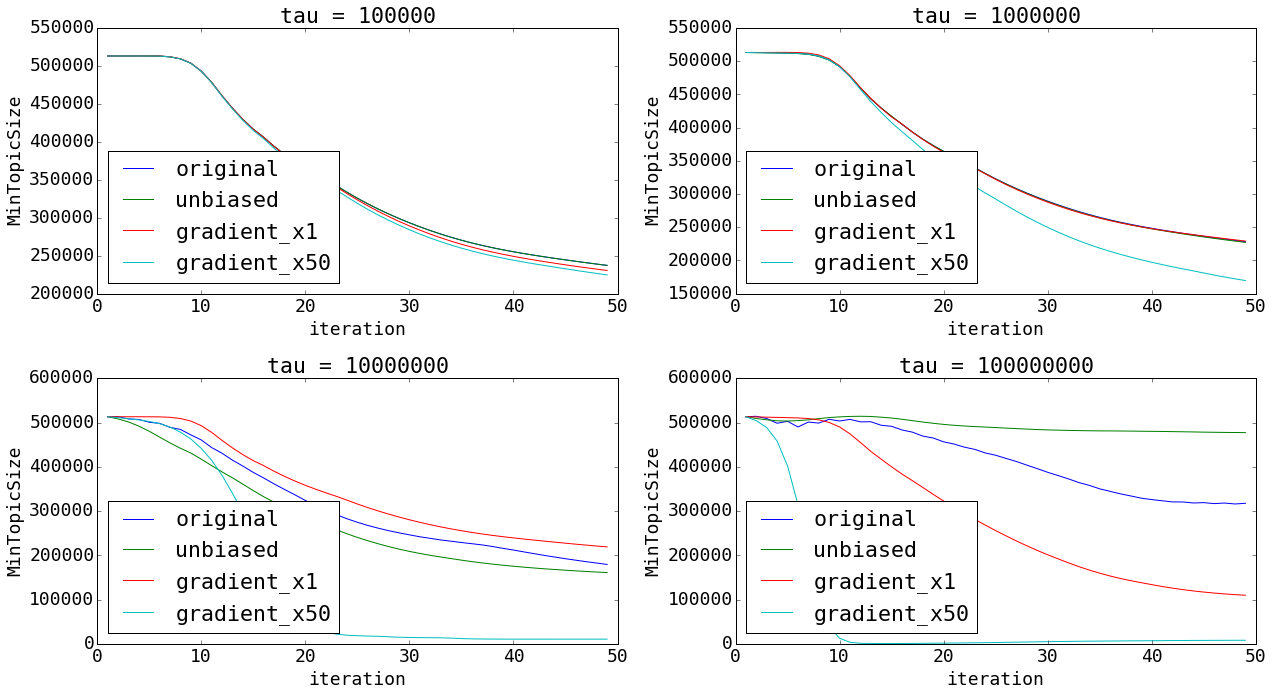

In [111]:
plot(10, 'MinTopicSize', 'lower left', 'iteration', 'MinTopicSize')

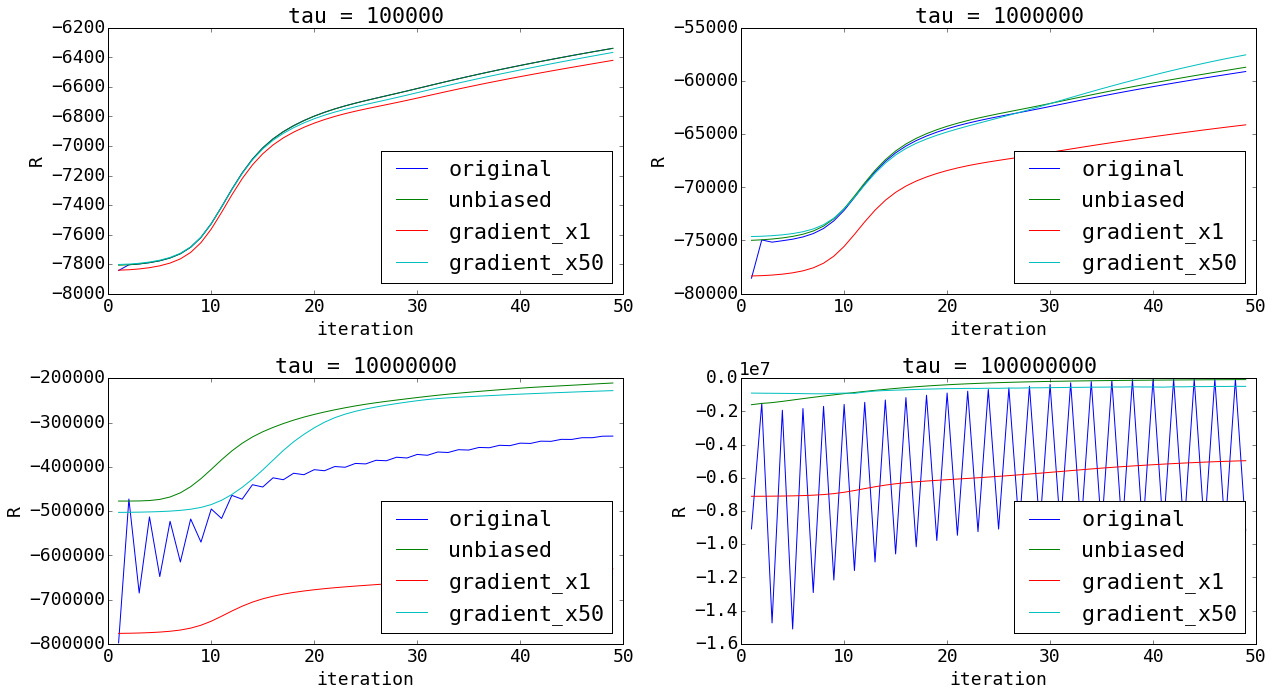

In [112]:
plot(10, 'R_values', 'lower right', 'iteration', 'R')

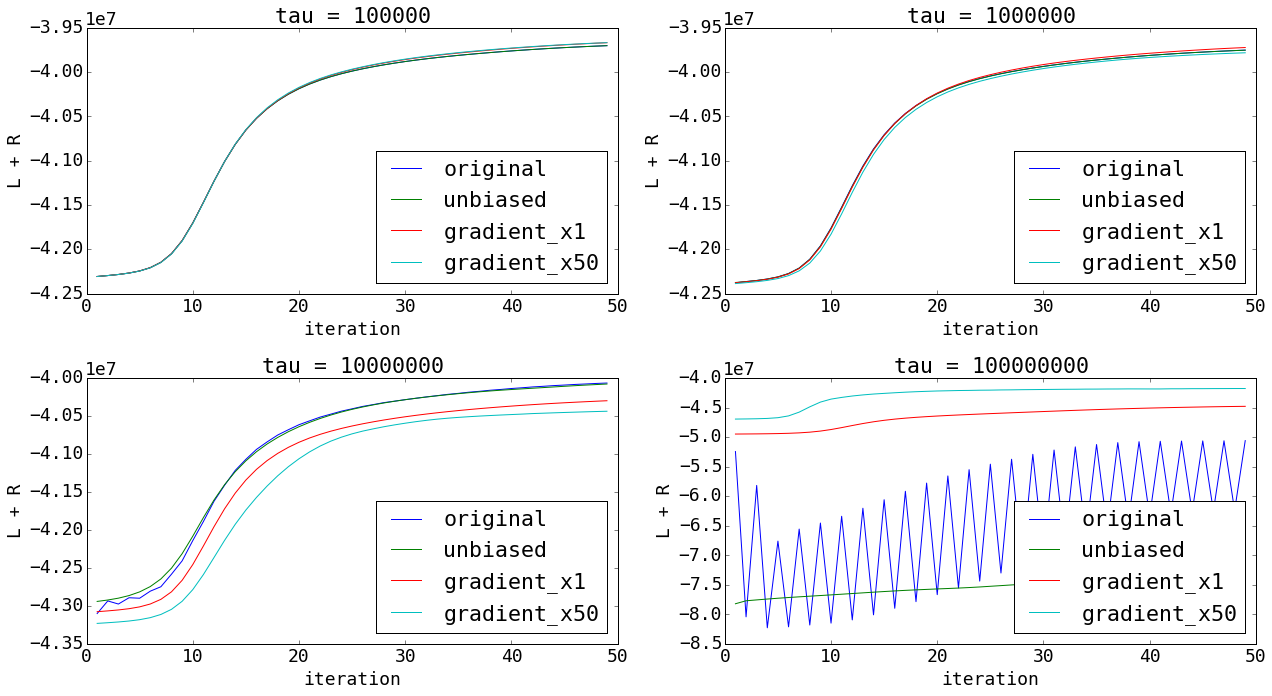

In [113]:
plot(10, 'LR_values', 'lower right', 'iteration', 'L + R')

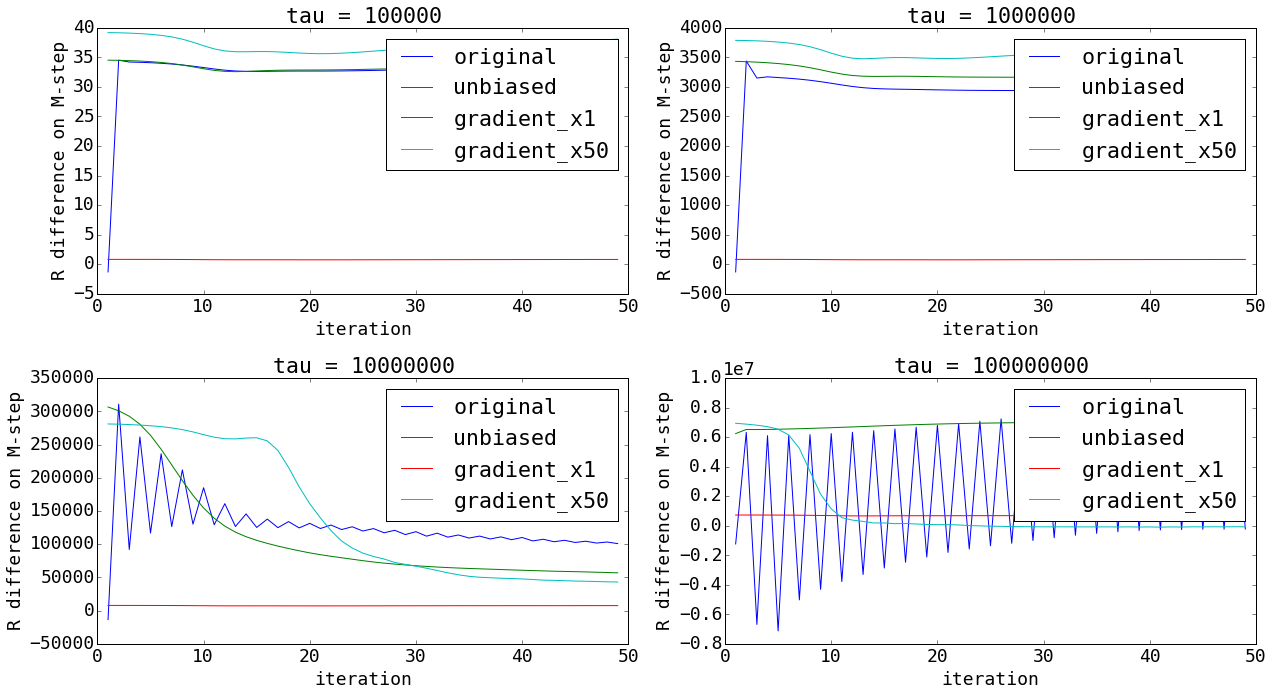

In [122]:
plot(10, 'RMstepDiff', 'upper right', 'iteration', 'R difference on M-step')

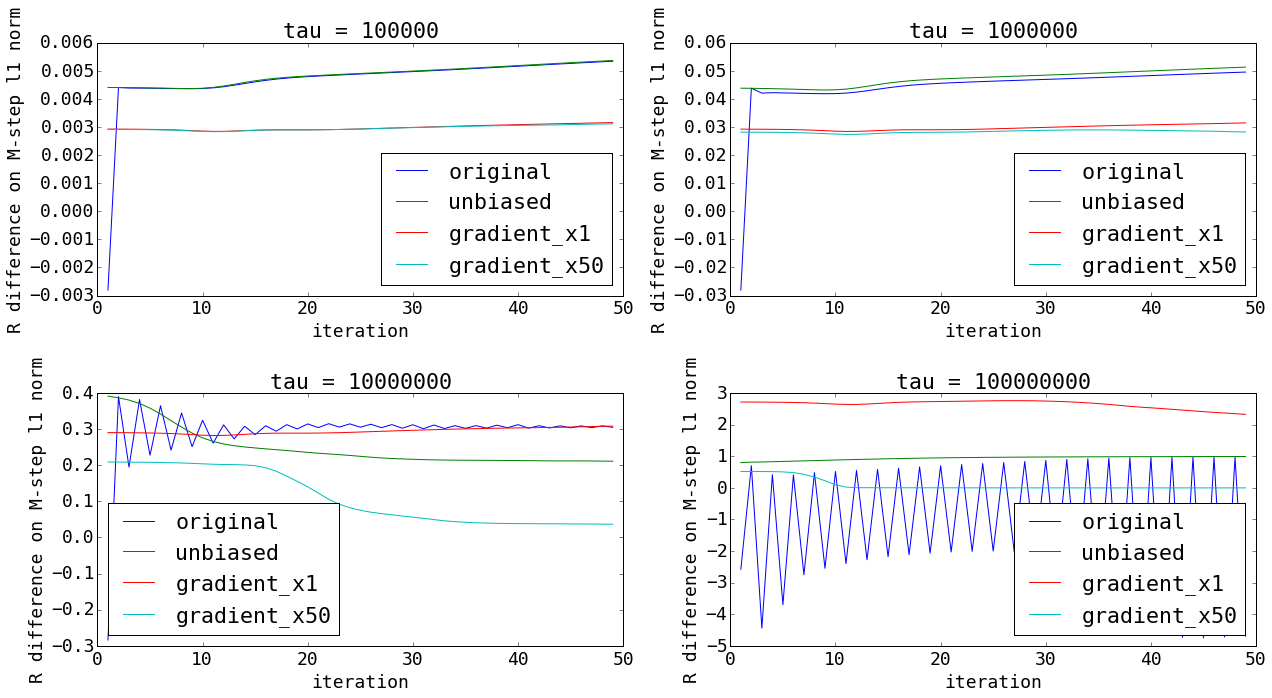

In [115]:
plot(10, 'RMstepDiffPerL1', 'best', 'iteration', 'R difference on M-step l1 norm')

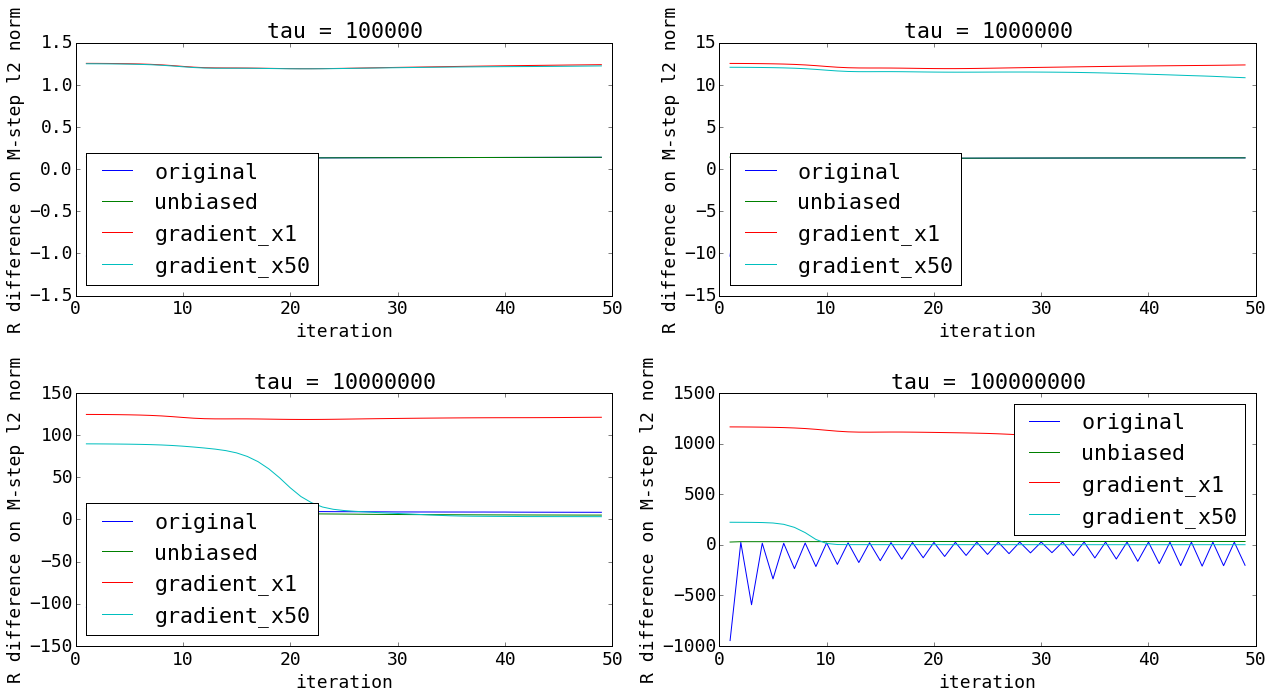

In [116]:
plot(10, 'RMstepDiffPerL2', 'best', 'iteration', 'R difference on M-step l2 norm')

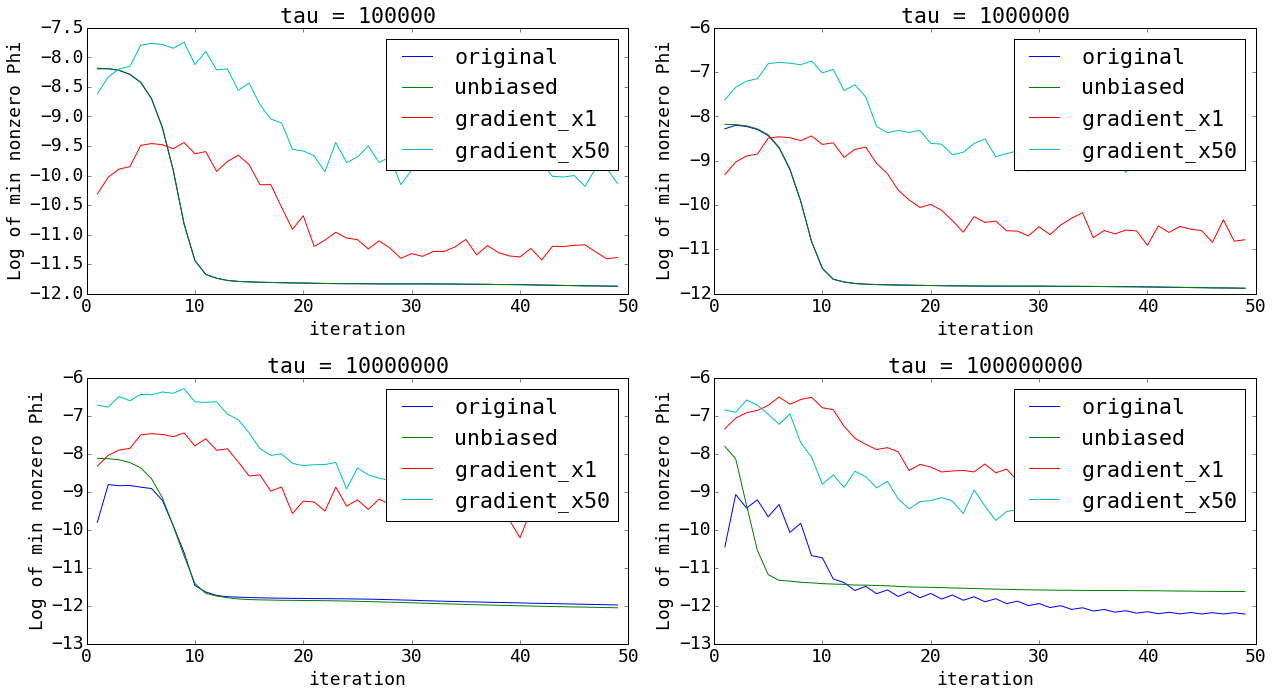

In [117]:
plot(10, 'minPhi_values', 'upper right', 'iteration', 'Log of min nonzero Phi')

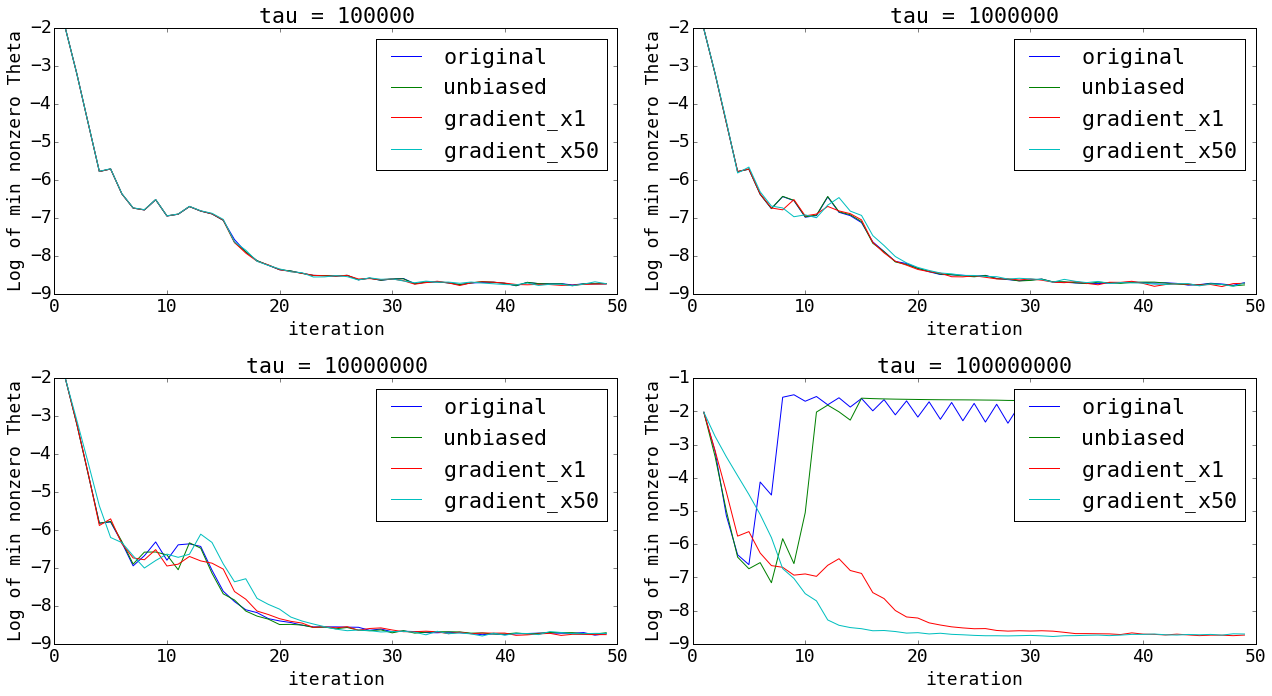

In [118]:
plot(10, 'minTheta_values', 'upper right', 'iteration', 'Log of min nonzero Theta')

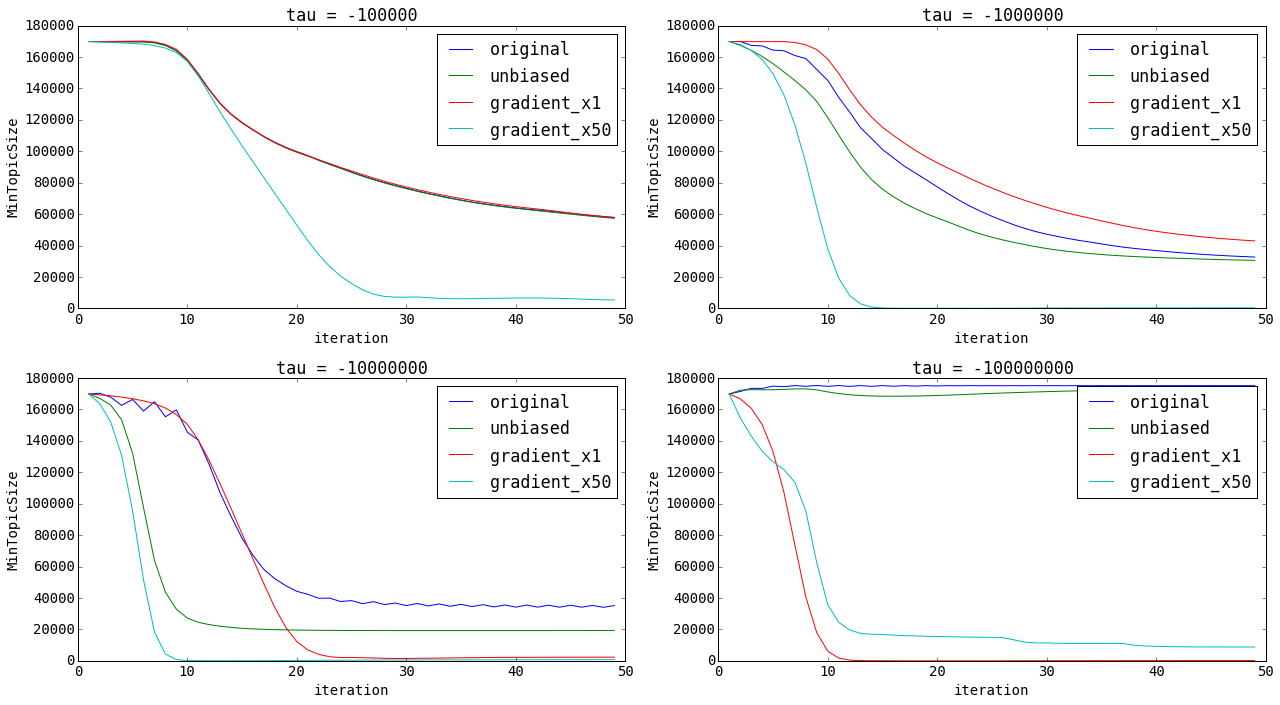

In [40]:
plot(30, 'MinTopicSize', 'upper right', 'iteration', 'MinTopicSize')

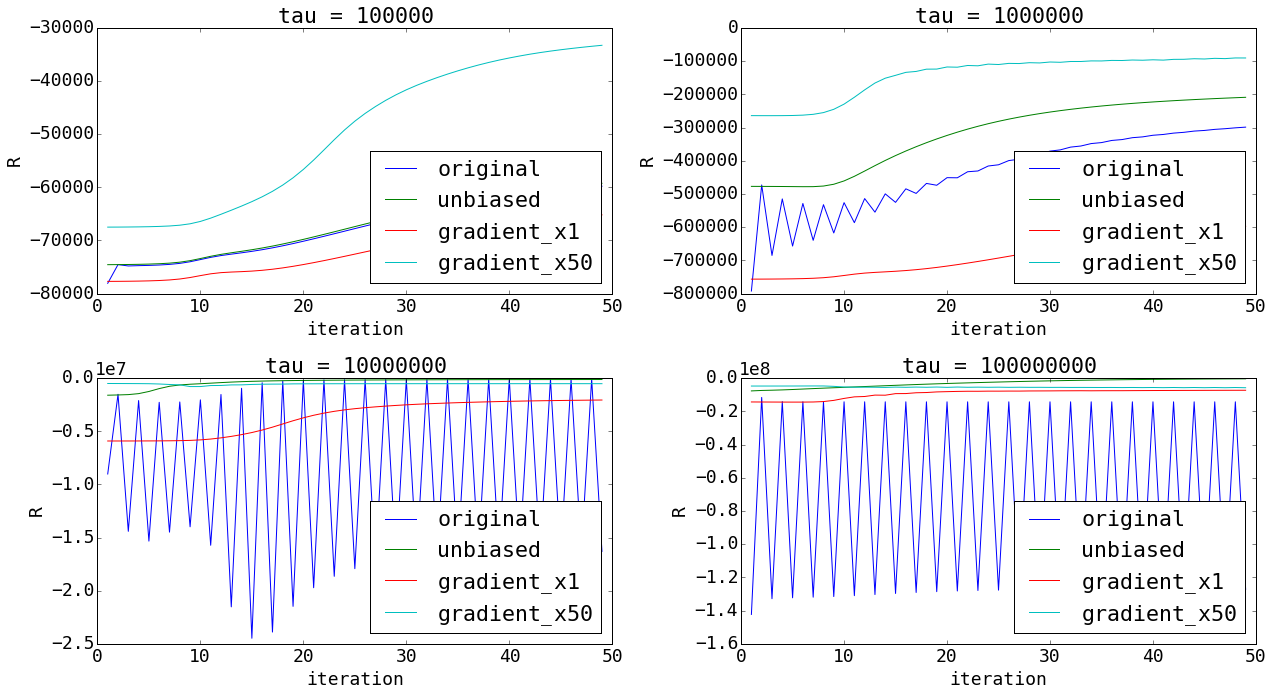

In [120]:
plot(30, 'R_values', 'lower right', 'iteration', 'R')

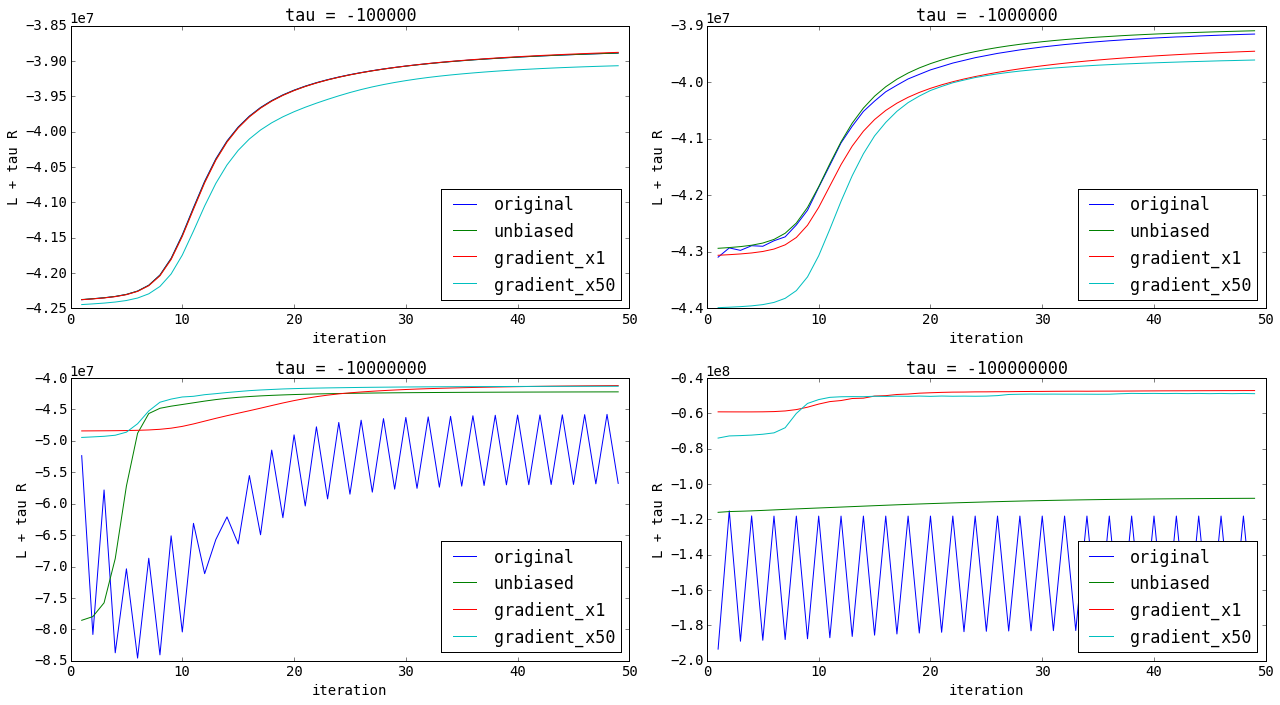

In [42]:
plot(30, 'LR_values', 'lower right', 'iteration', 'L + tau R')

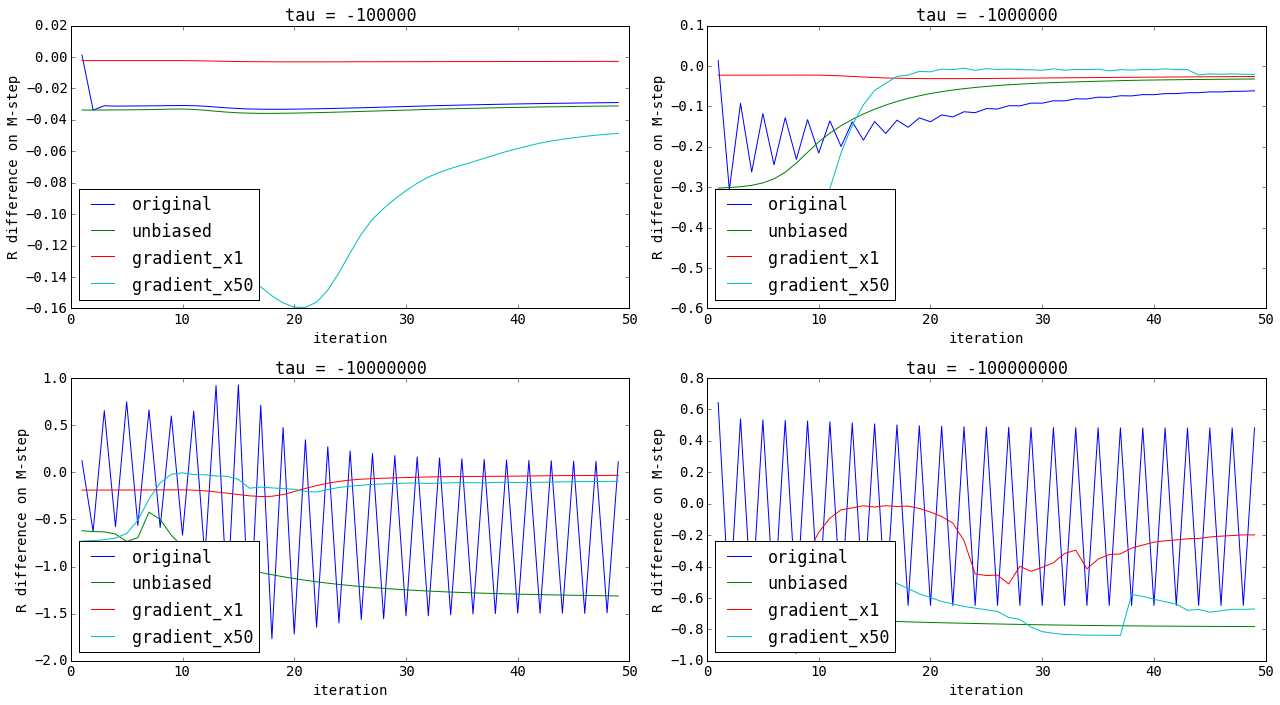

In [43]:
plot(30, 'RMstepDiff', 'lower left', 'iteration', 'R difference on M-step')

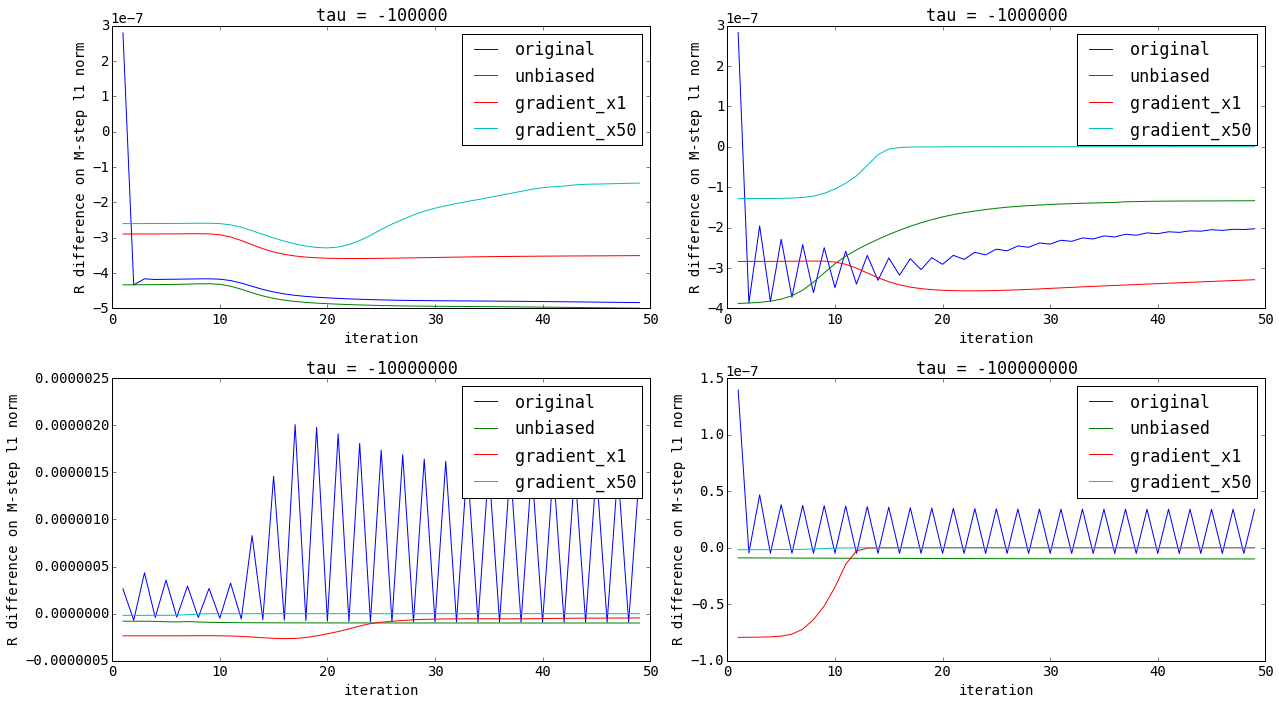

In [44]:
plot(30, 'RMstepDiffPerL1', 'upper right', 'iteration', 'R difference on M-step l1 norm')

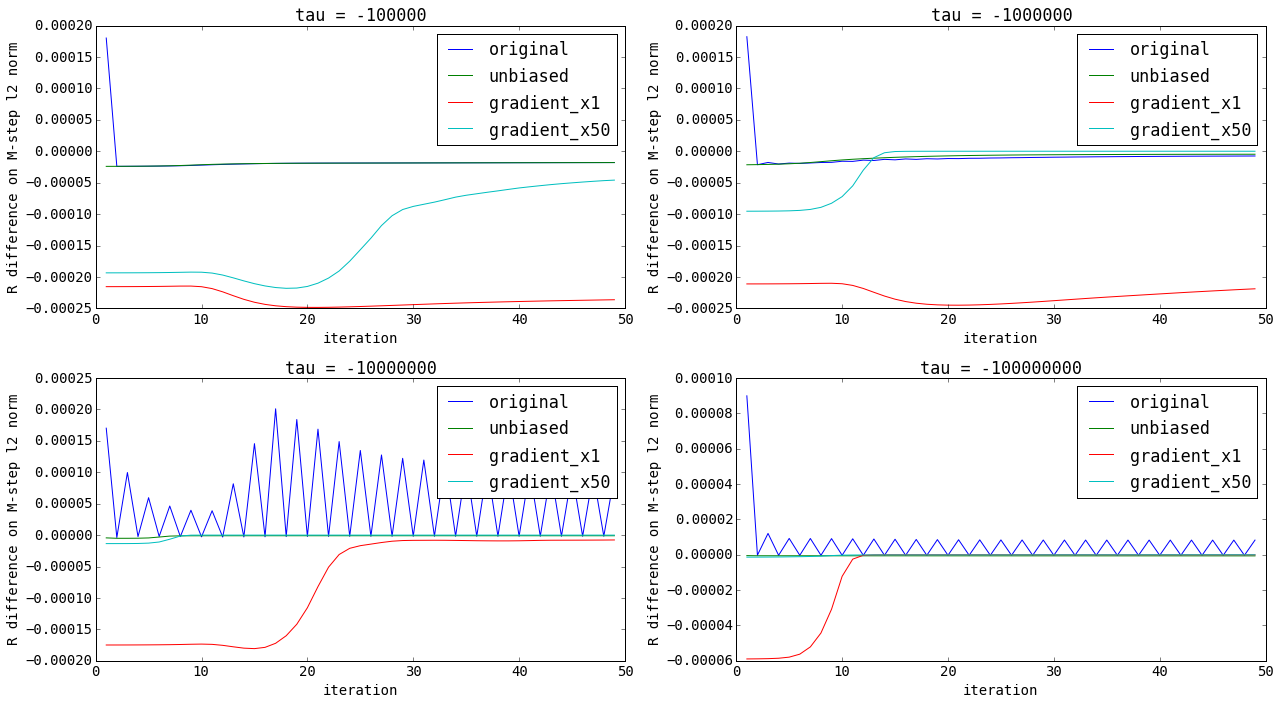

In [45]:
plot(30, 'RMstepDiffPerL2', 'upper right', 'iteration', 'R difference on M-step l2 norm')

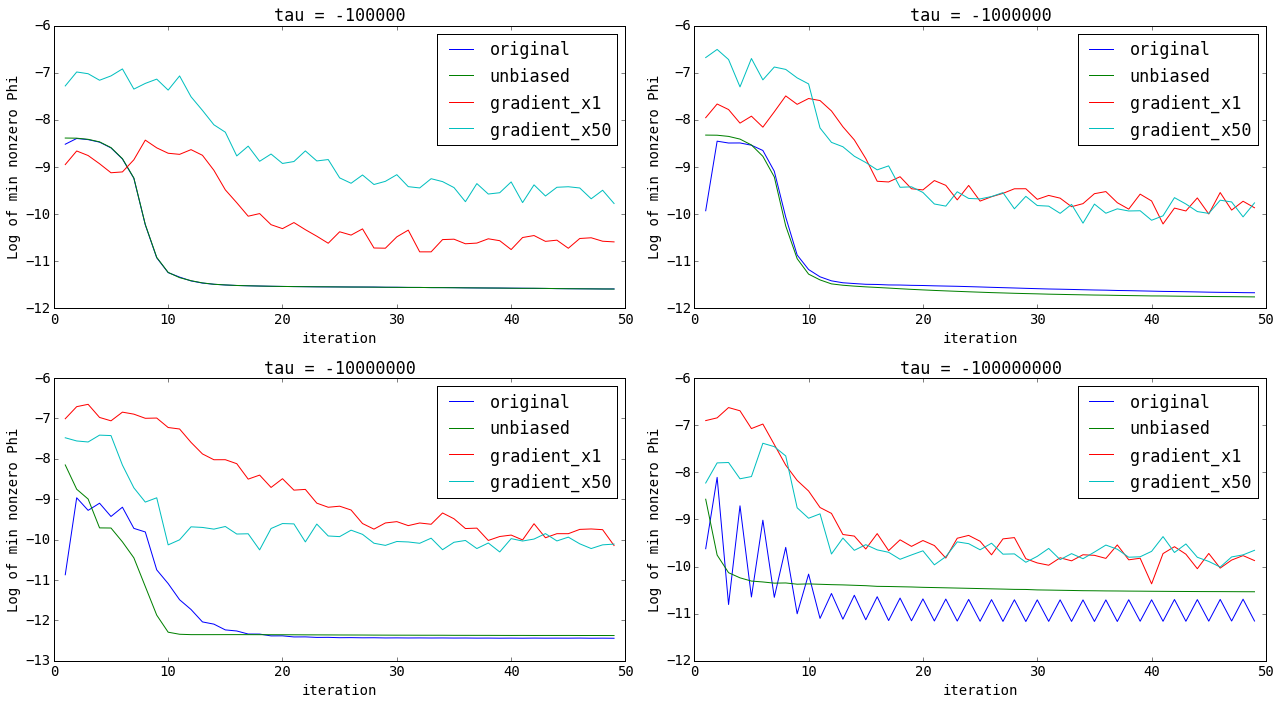

In [46]:
plot(30, 'minPhi_values', 'upper right', 'iteration', 'Log of min nonzero Phi')

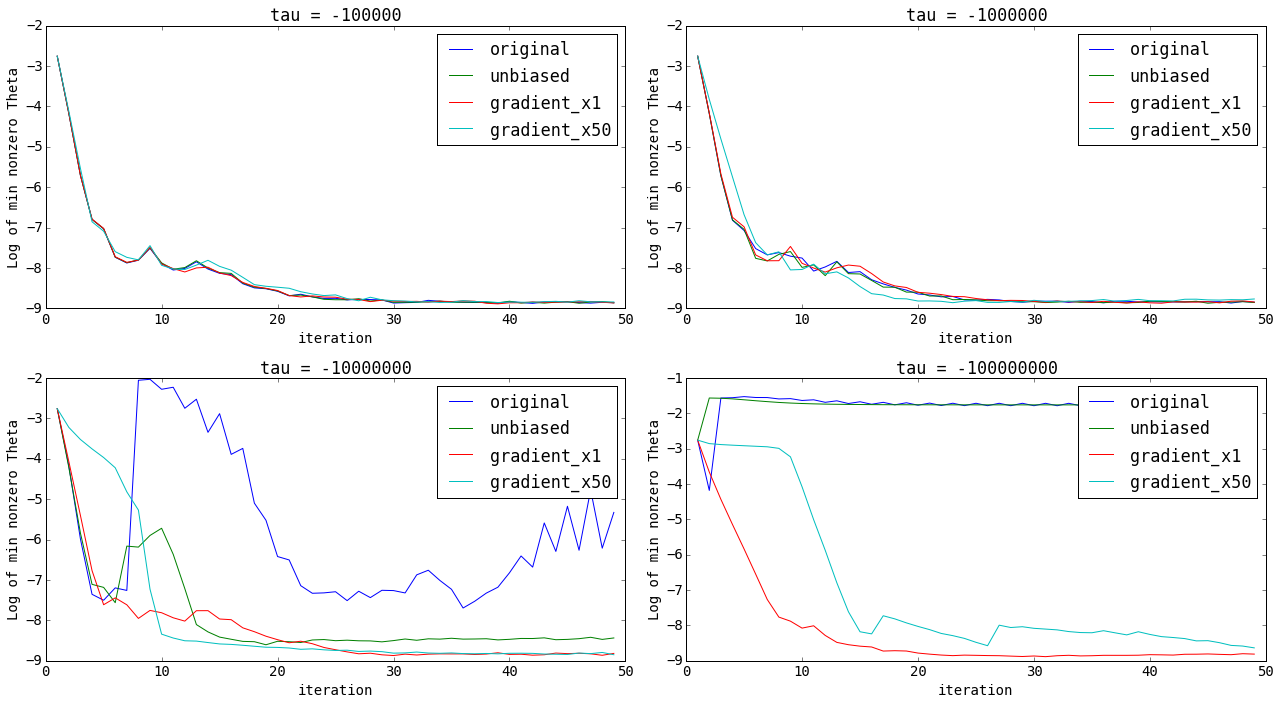

In [47]:
plot(30, 'minTheta_values', 'upper right', 'iteration', 'Log of min nonzero Theta')

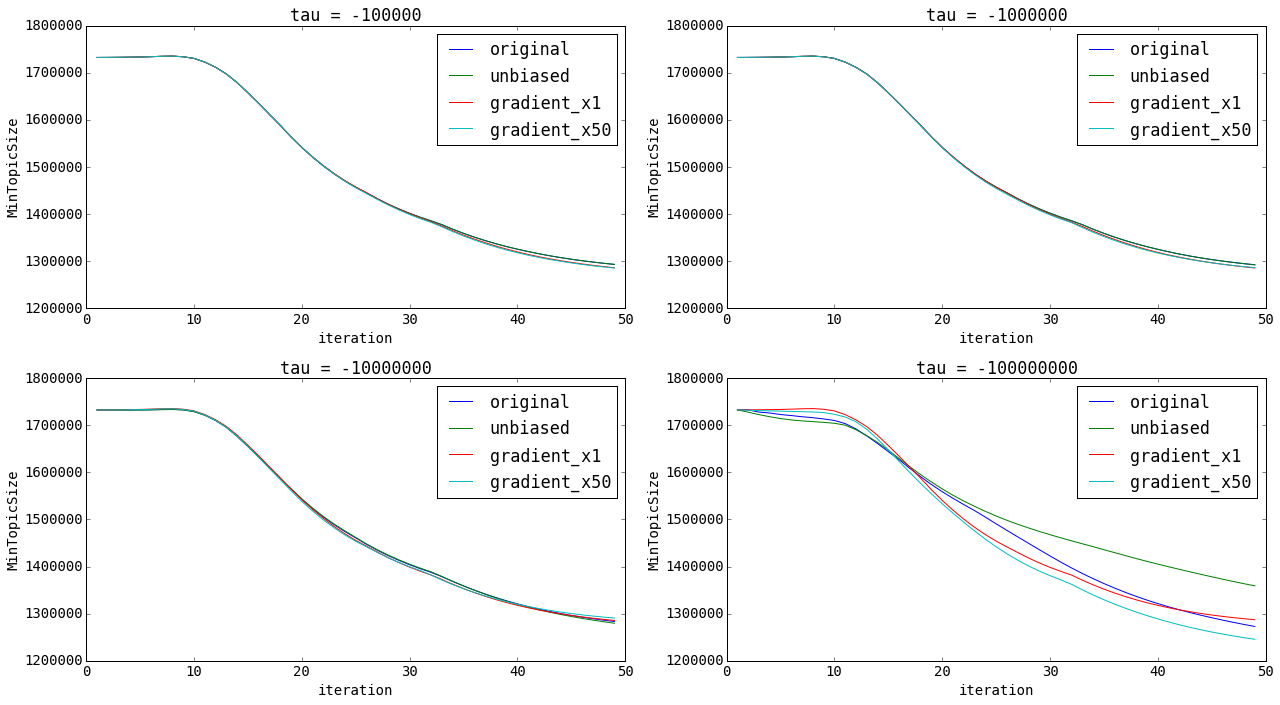

In [48]:
plot(3, 'MinTopicSize', 'upper right', 'iteration', 'MinTopicSize')

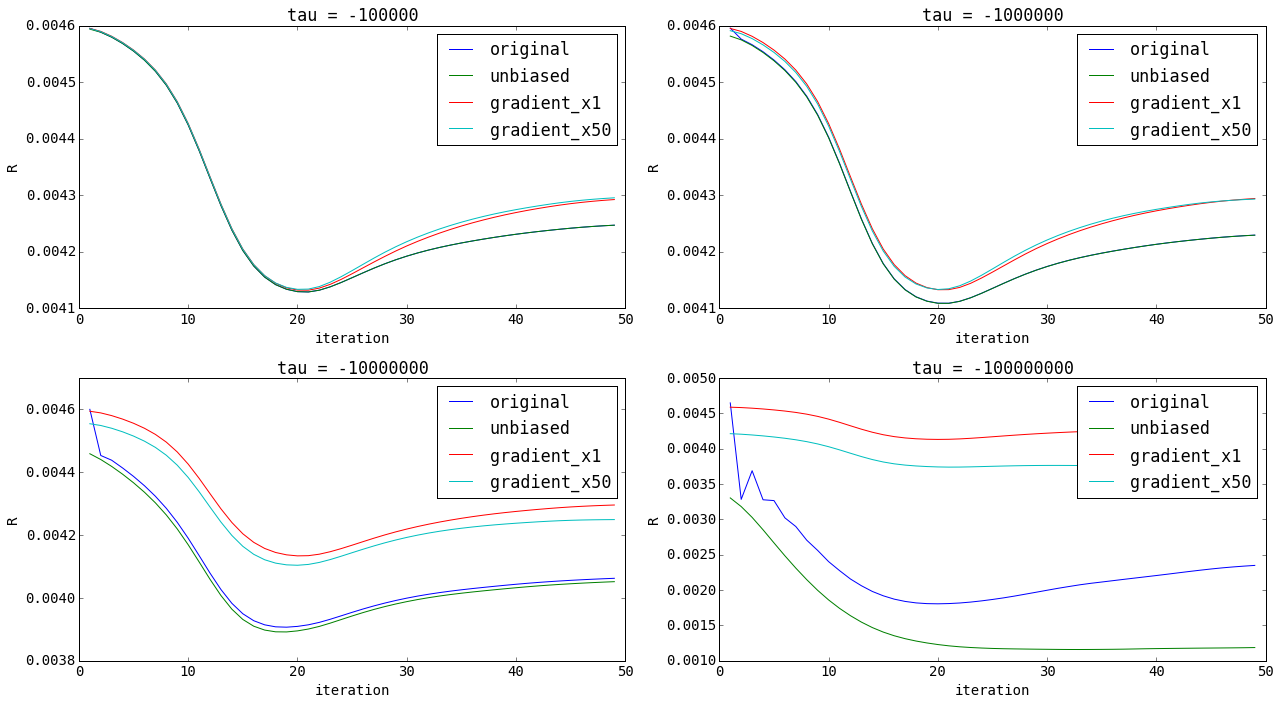

In [49]:
plot(3, 'R_values', 'upper right', 'iteration', 'R')

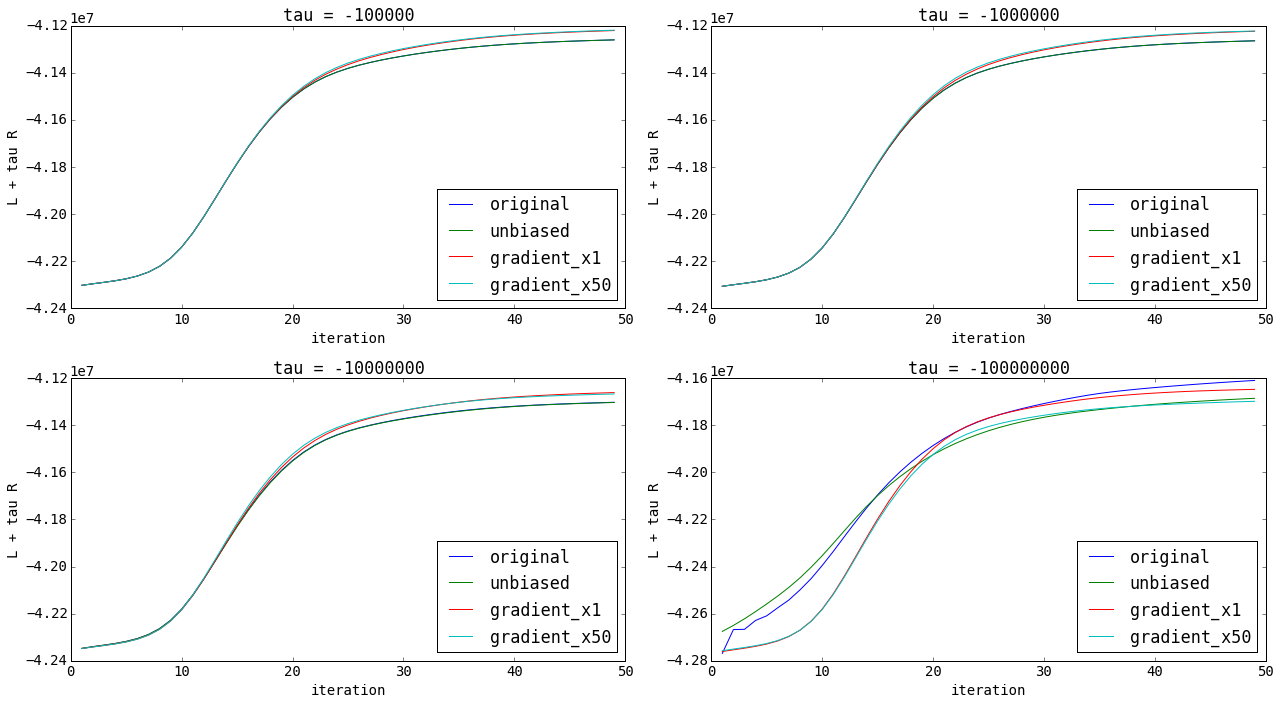

In [50]:
plot(3, 'LR_values', 'lower right', 'iteration', 'L + tau R')

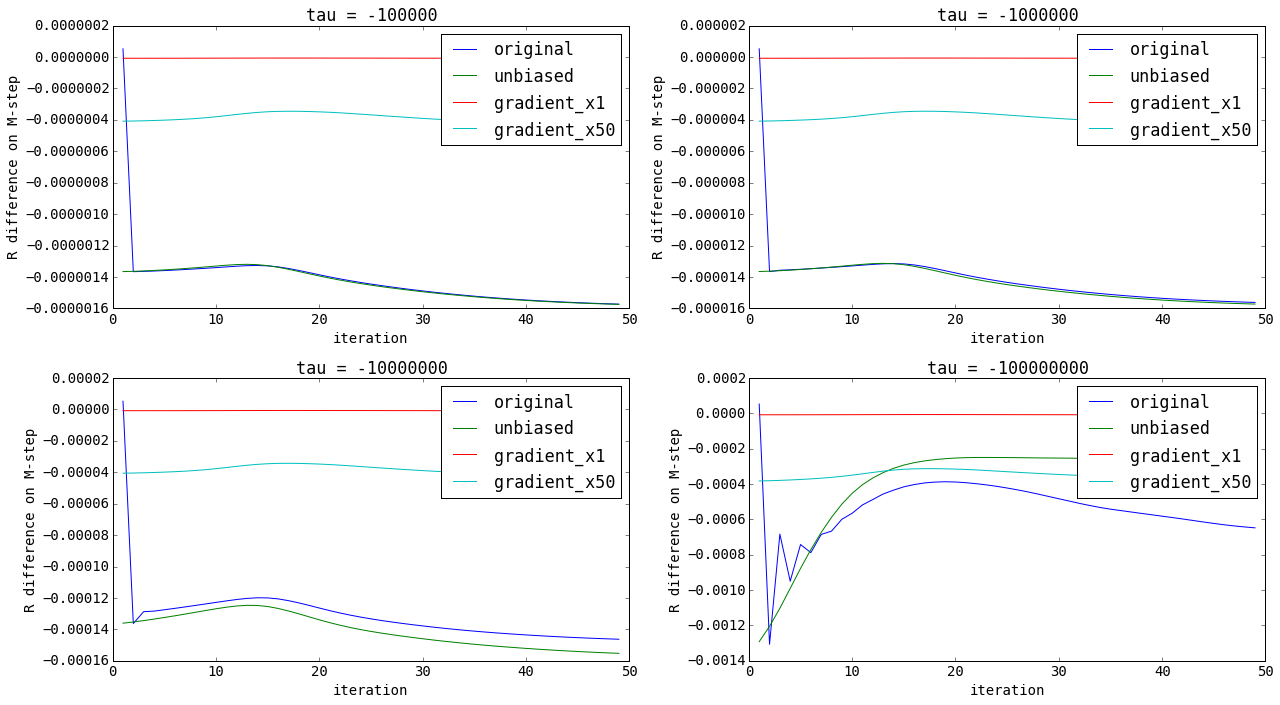

In [51]:
plot(3, 'RMstepDiff', 'upper right', 'iteration', 'R difference on M-step')

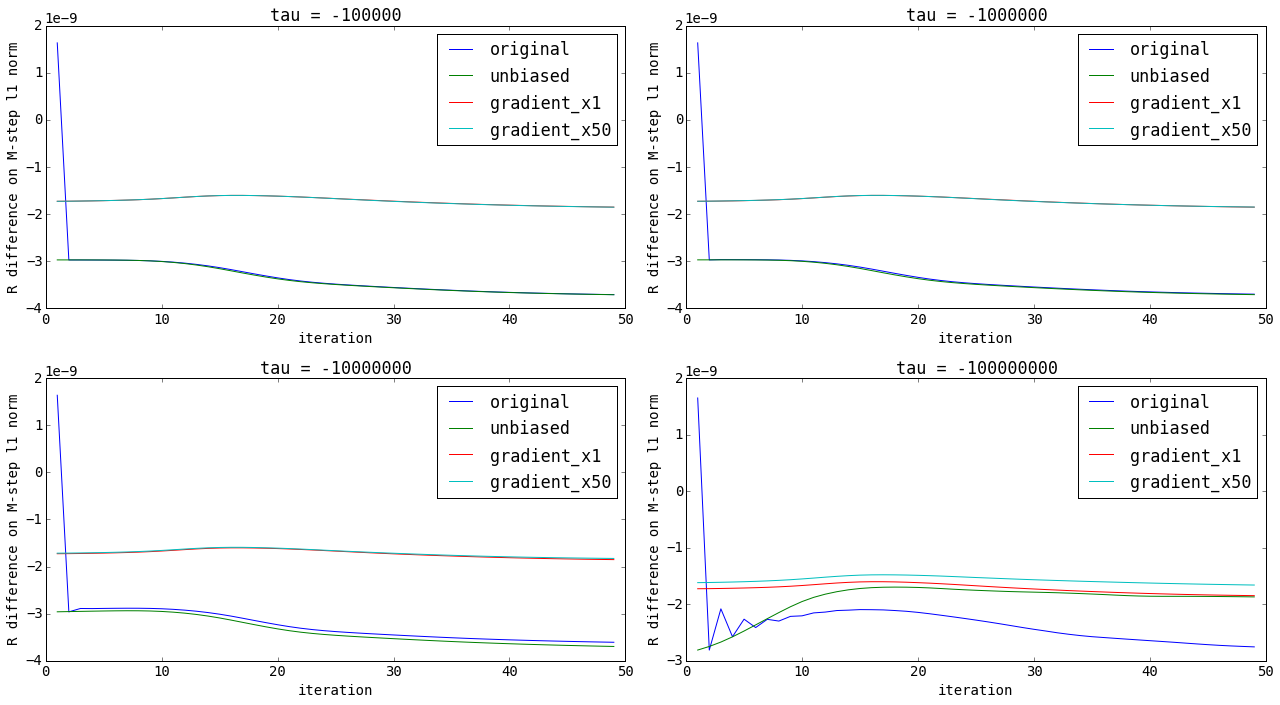

In [52]:
plot(3, 'RMstepDiffPerL1', 'upper right', 'iteration', 'R difference on M-step l1 norm')

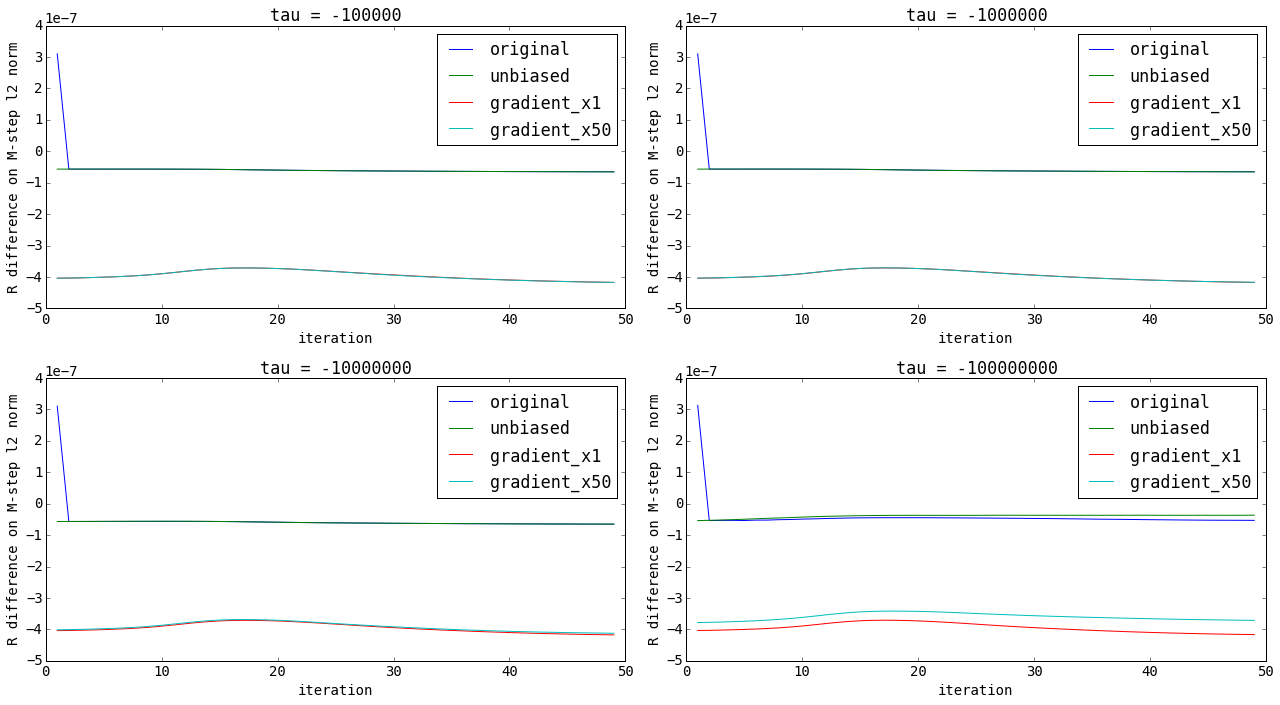

In [53]:
plot(3, 'RMstepDiffPerL2', 'upper right', 'iteration', 'R difference on M-step l2 norm')

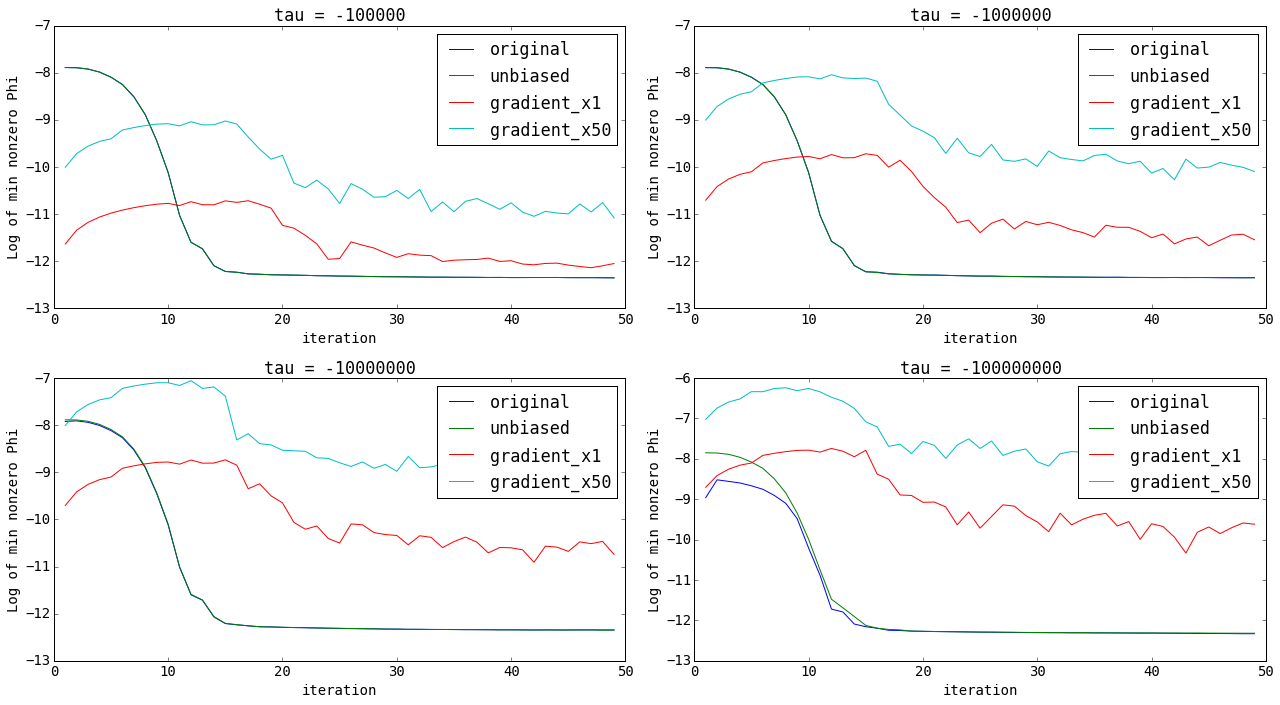

In [54]:
plot(3, 'minPhi_values', 'upper right', 'iteration', 'Log of min nonzero Phi')

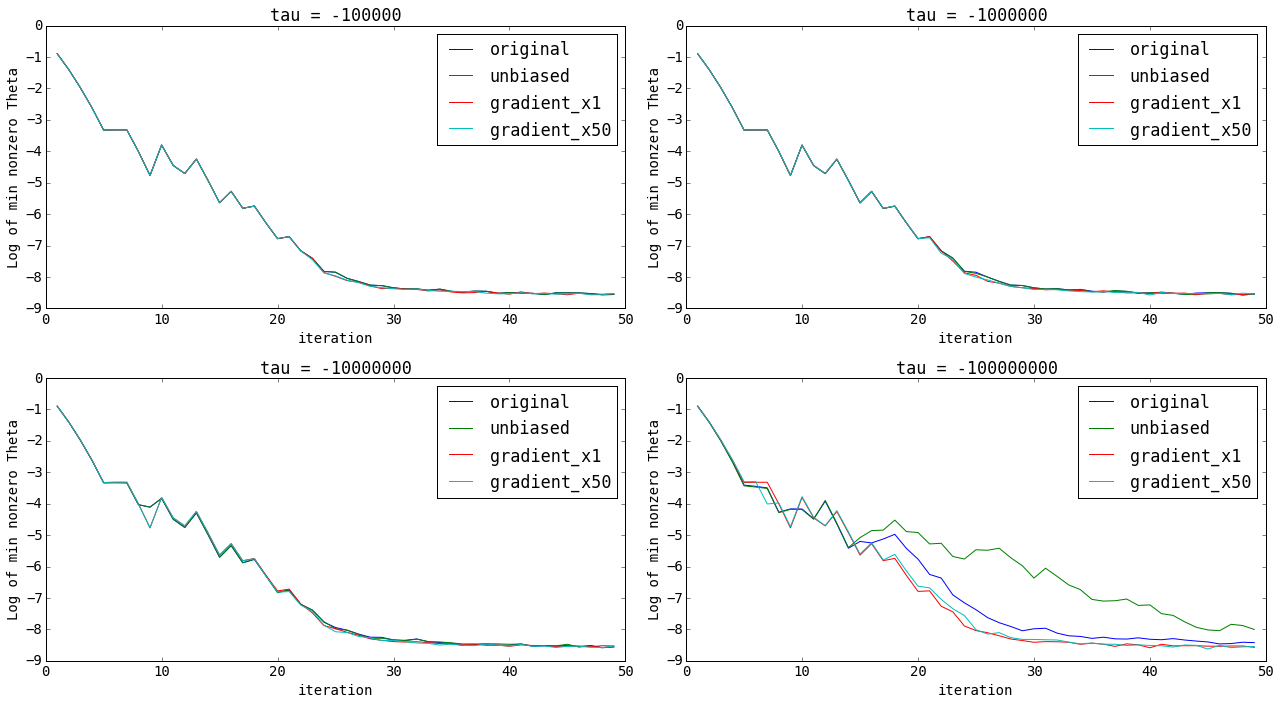

In [55]:
plot(3, 'minTheta_values', 'upper right', 'iteration', 'Log of min nonzero Theta')